In [1]:
import scanpy as sc
import squidpy as sq

import numpy as np
import pandas as pd

In [3]:
adata = sc.read_h5ad('datasets/multiome/multiome_rna.h5ad')
adata

AnnData object with n_obs × n_vars = 2535 × 2000
    obs: 'cell_type'
    var: 'gene_ids', 'feature_types'
    obsm: 'spatial'

In [4]:
df = pd.read_csv('Bio_results/multiome/tumor2_obs.csv',index_col=0)

In [6]:
adata_ = adata[df.index].copy()
adata_

AnnData object with n_obs × n_vars = 247 × 2000
    obs: 'cell_type'
    var: 'gene_ids', 'feature_types'
    obsm: 'spatial'

In [8]:
sc.pp.normalize_total(adata_)
sc.pp.log1p(adata_)
adata_.obs = df

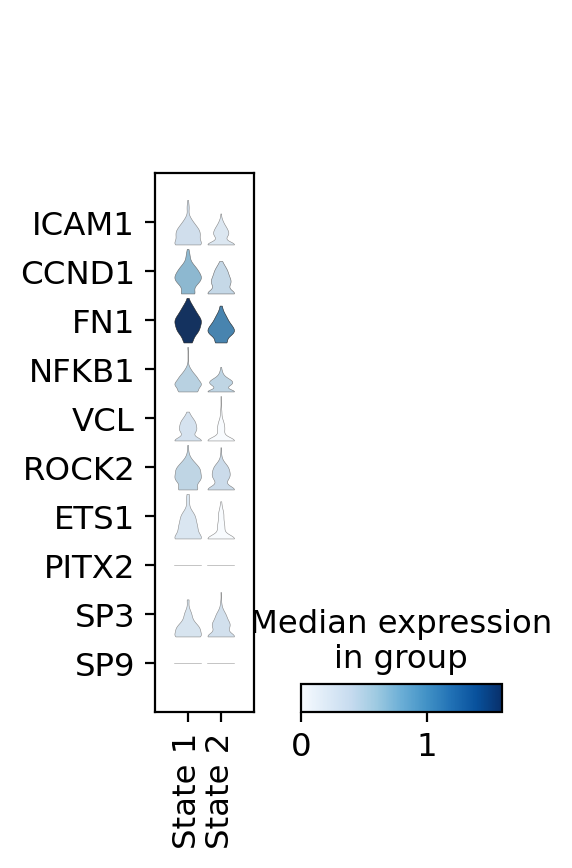

In [14]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams["font.size"] = 14
sc.pl.stacked_violin(adata_,['ICAM1','CCND1','FN1','NFKB1','VCL','ROCK2','ETS1','PITX2','SP3','SP9'],'state',swap_axes=True,save='rna_tumor2marker_swap_new.pdf')